<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></span></li><li><span><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></li><li><span><a href="#Reminders" data-toc-modified-id="Reminders-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reminders</a></span></li><li><span><a href="#Colors-for-seekr_web" data-toc-modified-id="Colors-for-seekr_web-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Colors for seekr_web</a></span></li><li><span><a href="#Correcting-chisquared-table" data-toc-modified-id="Correcting-chisquared-table-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correcting chisquared table</a></span></li></ul></div>

# Watermark

In [1]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Wed Sep 06 2017 

CPython 3.6.2
IPython 6.1.0

numpy 1.13.1
scipy 0.19.1
pandas 0.20.3
sklearn 0.19.0
matplotlib 2.0.2
seaborn 0.8.0
networkx 1.11
notebook 5.0.0
jupyter_contrib_nbextensions 0.2.8

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 4.10.0-33-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from scipy.stats import chisquare

### Autoimport my code

In [2]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [3]:
cd ..

/home/jessime/Code/kmers3


In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

### Plotting

In [6]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Reminders

* All images should be saved as pdfs. They can be converted from pdf to png as necessary, but you can’t convert a png to pdf.
* When finished with a notebook, archive it with `jupyter nbconvert --to pdf nb.ipynb`

# Colors for seekr_web

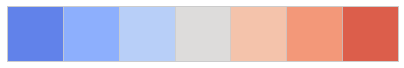

In [7]:
sns.palplot(sns.color_palette("coolwarm", 7))

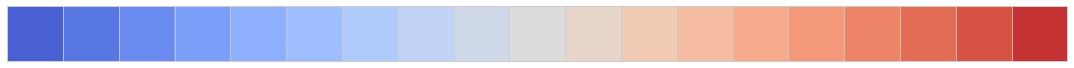

In [8]:
sns.palplot(sns.color_palette("coolwarm", 19))

In [10]:
sns.color_palette("coolwarm", 19).as_hex()

['#4961d2',
 '#5977e3',
 '#6a8bef',
 '#7b9ff9',
 '#8db0fe',
 '#9ebeff',
 '#afcafc',
 '#c0d4f5',
 '#cfdaea',
 '#dddcdc',
 '#e9d5cb',
 '#f2cbb7',
 '#f6bda2',
 '#f7ac8e',
 '#f4987a',
 '#ee8468',
 '#e36c55',
 '#d65244',
 '#c53334']

# Correcting chisquared table

In [7]:
def get_ids(path):
    with open(path) as infile:
        return [line.strip() for line in infile]
    
id_paths = [
    'v26_lnc_unspliced_transcript_ids.txt',
    'v26_lnc_spliced001_transcript_ids.txt',
    'v26_pc_unspliced_transcript_ids.txt',
    'v26_pc_spliced001_transcript_ids.txt'
]
folder = '/home/jessime/Research/mrna_lncrna/'
v26_combo_ids = []
for id_path in id_paths:
    ids = get_ids(folder+id_path)
    v26_combo_ids += ids
    

v26_groups = '/home/jessime/Research/mrna_lncrna/v26_extend_groups2.csv'
v26_groups = pd.read_csv(v26_groups, index_col=0)
v26_groups = v26_groups.iloc[list(range(len(v26_combo_ids)))] # get rid of doped lncs
v26_groups['transcript_id'] = v26_combo_ids
v26_groups = v26_groups.set_index('transcript_id')
v26_groups = v26_groups[['group']]
print(v26_groups.shape)

(65679, 1)


In [8]:
observed = [
    0,
    1,
    3,
    35,
    19,
    7,
    121,
    12,
    79,
    12,
    0,
]
comm_sizes = v26_groups['group'].value_counts()
df = pd.DataFrame(observed, columns=['observed'])
total = 65679
df['expected'] = [int(289 * (i/total)) for i in comm_sizes]
df['observed_out'] = [size - obs for obs, size in zip(df['observed'], comm_sizes)]
df['expected_out'] = [size - exp for exp, size in zip(df['expected'], comm_sizes)]
p_values = []
for i, row in df.iterrows():
    p_values.append(chisquare([row['observed'], row['observed_out']],
                              [row['expected'], row['expected_out']])[1])
df['p-value'] = p_values
df

observed  expected  observed_out  expected_out       p-value
0          0        39          8950          8911  3.883266e-10
1          1        35          8074          8040  8.434124e-09
2          3        32          7278          7249  2.779336e-07
3         35        29          6751          6757  2.641823e-01
4         19        28          6356          6347  8.827136e-02
5          7        27          6159          6139  1.145730e-04
6        121        27          6031          6125  1.842991e-73
7         12        25          5859          5846  9.172597e-03
8         79        22          5034          5091  4.038131e-34
9         12        18          4152          4146  1.564010e-01
10         0         3           746           743  8.264449e-02

In [9]:
outpath = '/home/jessime/Dropbox/Documents/dissertation/top289_groups_chisquare.csv'
df.to_csv(outpath)